## This is example for DCON.jl

**Running `DCON.jl` is currently only supported on x86 Linux systems yet.** 

If you’re using a different CPU architecture or operating system, please compile DCON manually and place the executable files in the `DCON/executables` directory.  
Make sure that a NetCDF output file is successfully generated after execution.

In [1]:
import Pkg
Pkg.activate("..")
Pkg.instantiate()
include("../src/DCON.jl")
using .DCON
# using DCON

  Activating project at `~/code/DCON`
Precompiling project...
   2408.7 ms  ? DCON


### Initializing input variables

DCON.jl ini and gfile as an input.  
You can edit input parameters with ini (equil, dcon, rdcon, stride, vac)

In [2]:
ini = DCON.Input();
gfile_path = "./../g000000.00000";

┌ Info: DCON.jl has binary file for your CPU architecture
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:46


/home/aspire1019/code/DCON/src/../inputs


### Input Structure Overview

- `dcon`, `rdcon`, `stride`, `vac`, `equil`  
  → Correspond to `*.in` input files for each code module.

- `ideal_n`  
  → Mode numbers for running DCON (ideal MHD).  
  Example: `ini.ideal_n = [1, 4]` runs n = 1 and 4.

- `resistive_n`  
  → Mode numbers for running RDCON and STRIDE (resistive MHD).

- `ballooning`  
  → If `true`, runs ballooning stability analysis during `run_stability()`.

- `directory`  
  → Working directory. If `nothing`, a temp directory is auto-created.  
  Recommended: `nothing`.

- `remove`  
  → If `true`, deletes the working directory after execution.

In [4]:
ini

Main.DCON.InputFiles
├─ dcon = Main.DCON.DCONNamelist(Main.DCON.DCONControl(false, true, true, true, true, false, 0.2, 0.988, 1.02, 20.2, 0, false, 1, 8, 8, 0, 512, 1.0, false, false, 1.0, 1.0, 0, true, true, false, 0.1, 50.0, true, false, 0, 1.0e-6, 1.0e-7, 0.01, 0.0001, 1000.0, true, false, false), Main.DCON.DCONOutput(false, true, false, 1, 1, false, 1, false, false, false, false, true))
├─ rdcon = Main.DCON.RdconNamelist(Main.DCON.GalInput(256, 0.001, 1.0e-10, true, 0.0005, 0.001, 0.001, 10, "LU", 6, false, false, false, false, 12), Main.DCON.GalOutput(3, true, true, true, true, true, true, false), Main.DCON.RdconControl(false, true, true, true, true, true, 0.2, 0, 1, 8, 8, 0, 512, 1.0, 1.0e-5, 1.0e-6, 0.01, 0.0001, 10000.0, false, false, 6, true, false), Main.DCON.RdconOutput(true, false, 1, 1, true, 1, false, false, false, false), Main.DCON.UaDiagnoseList())
├─ stride = Main.DCON.StrideNamelist(Main.DCON.StrideControl(true, true, true, true, true, true, 0.2, 1.02, 1000.0, 0, 1, 8

### Running DCON

You can run DCON with function `run_dcon`.  
Outputs are dcon_result, and δW.  
Negative δW means plasma is unstable for a given mode number, whilst positive is stable 

In [4]:
dcon_result, δW = DCON.run_dcon(ini, gfile_path)

tmp_dir은 :/tmp/dcon_bc996a57-06a3-4d2c-ba1d-c9d73c6586c9
 
 DCON START => v1.5.5-176-g80749fc
 __________________________________________
 Forming the equilibirum
   Equilibrium: gfile, Type: efit
   Jac_type = hamada, power_bp = 0, power_b = 0, power_r = 0
   psilow  = 1.000E-02
   psihigh = 9.940E-01
   etol =  1.000E-07


┌ Info: Running DCON for n = 1
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:134


 Evaluating Mercier criterion
   q0 =  1.961E+00, qmin =  1.934E+00, qmax =  6.416E+00, q95 =  5.528E+00
   sas_flag = F, dmlim =  2.000E-01, qlim =  6.416E+00, psilim =  9.940E-01
   betat =  3.348E-02, betan =  3.636E+00, betap1 =  2.349E+00
   nn =    1, mlow =  -12, mhigh =   22, mpert =   35, mband =   34
 Fourier analysis of metric tensor components
 Computing F, G, and K Matrices
 Starting integration of ODE's
   psi = 1.000E-02, q =  1.960
   psi = 1.629E-01, q =  2.000
   psi = 5.091E-01, q =  3.000
   psi = 7.019E-01, q =  4.000
   psi = 8.989E-01, q =  5.000
   psi = 9.843E-01, q =  6.000
   > Vacuum code overriding r 1.00E+00 from vac.in, to be 0
   psi = 9.940E-01, q =  6.416
 Re-Integrating to peak dW @ qlim =  6.177274, psilim =  0.989309
   psi = 1.000E-02, q =  1.960
   psi = 1.629E-01, q =  2.000
   psi = 5.091E-01, q =  3.000
   psi = 7.019E-01, q =  4.000
   psi = 8.989E-01, q =  5.000
   psi = 9.843E-01, q =  6.000
   psi = 9.893E-01, q =  6.177
 Computing free bou

┌ Info: Running DCON for n = 2
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:134


   q0 =  1.961E+00, qmin =  1.934E+00, qmax =  6.416E+00, q95 =  5.528E+00
   sas_flag = F, dmlim =  2.000E-01, qlim =  6.416E+00, psilim =  9.940E-01
   betat =  3.348E-02, betan =  3.636E+00, betap1 =  2.349E+00
   nn =    2, mlow =  -12, mhigh =   28, mpert =   41, mband =   40
 Fourier analysis of metric tensor components
 Computing F, G, and K Matrices
 Starting integration of ODE's
   psi = 1.000E-02, q =  1.960
   psi = 1.629E-01, q =  2.000
   psi = 3.542E-01, q =  2.500
   psi = 5.091E-01, q =  3.000
   psi = 6.225E-01, q =  3.500
   psi = 7.019E-01, q =  4.000
   psi = 8.179E-01, q =  4.500
   psi = 8.989E-01, q =  5.000
   psi = 9.460E-01, q =  5.500
   psi = 9.843E-01, q =  6.000
   > Vacuum code overriding r 1.00E+00 from vac.in, to be 0
   psi = 9.940E-01, q =  6.416
 Re-Integrating to peak dW @ qlim =  6.208741, psilim =  0.990049
   psi = 1.000E-02, q =  1.960
   psi = 1.629E-01, q =  2.000
   psi = 3.542E-01, q =  2.500
   psi = 5.091E-01, q =  3.000
   psi = 6.225E-01

┌ Info: Running DCON for n = 3
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:134


 Evaluating Mercier criterion
   q0 =  1.961E+00, qmin =  1.934E+00, qmax =  6.416E+00, q95 =  5.528E+00
   sas_flag = F, dmlim =  2.000E-01, qlim =  6.416E+00, psilim =  9.940E-01
   betat =  3.348E-02, betan =  3.636E+00, betap1 =  2.349E+00
   nn =    3, mlow =  -12, mhigh =   35, mpert =   48, mband =   47
 Fourier analysis of metric tensor components
 Computing F, G, and K Matrices
 Starting integration of ODE's
   psi = 1.000E-02, q =  1.960
   psi = 1.629E-01, q =  2.000
   psi = 2.953E-01, q =  2.333
   psi = 4.101E-01, q =  2.667
   psi = 5.091E-01, q =  3.000
   psi = 5.890E-01, q =  3.333
   psi = 6.515E-01, q =  3.667
   psi = 7.019E-01, q =  4.000
   psi = 7.565E-01, q =  4.333
   psi = 8.692E-01, q =  4.667
   psi = 8.989E-01, q =  5.000
   psi = 9.293E-01, q =  5.333
   psi = 9.675E-01, q =  5.667
   psi = 9.843E-01, q =  6.000
   > Vacuum code overriding r 1.00E+00 from vac.in, to be 0
   psi = 9.926E-01, q =  6.333
   psi = 9.940E-01, q =  6.416
 Re-Integrating to peak

┌ Info: Removed Directory !
│   path = /tmp/dcon_bc996a57-06a3-4d2c-ba1d-c9d73c6586c9
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:69


(Dict{Int64, Union{Nothing, Main.DCON.DCONOutputNetCDF}}(2 => Main.DCON.DCONOutputNetCDF([0, 1], [-12, -11, -10, -9, -8, -7, -6, -5, -4, -3  …  19, 20, 21, 22, 23, 24, 25, 26, 27, 28], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  32, 33, 34, 35, 36, 37, 38, 39, 40, 41], [0.01, 0.010148181201467524, 0.010592635547055184, 0.011333095314084414, 0.012369114477279132, 0.013700068977434681, 0.015325157097327761, 0.017243399944640907, 0.019453642041610618, 0.021954552021043953  …  0.9820454479789561, 0.9845463579583893, 0.986756600055359, 0.9886748429026722, 0.9902999310225652, 0.9916308855227208, 0.9926669046859157, 0.9934073644529449, 0.9938518187985325, 0.994], [27.859261975523562, 27.859740785302655, 27.861176324116517, 27.863565921725748, 27.866905132166835, 27.87118774041105, 27.87640577168906, 27.882549469462383, 27.889607029701203, 27.897564494946778  …  28.695542908478217, 28.69654801715176, 28.69734155833882, 28.697954848885015, 28.698417472477182, 28.698756238062707, 28.698994302127023, 28.6

### Running RDCON, SRIDE

You can run RDCON & STRIDE with function `run_rdcon` and `run_stride`.  
Outputs are result, and Δ'.  
Negative Δ' means plasma is stable for given mode number, whilst positive is unstable 

In [ ]:
rdcon_result, Δ_rdcon = DCON.run_rdcon(ini, gfile_path)
stride_result, Δ_stride = DCON.run_stride(ini, gfile_path)

tmp_dir은 :/tmp/dcon_438df775-6689-49fb-baeb-f114812210a6
 
 RDCON START => 
 __________________________________________
 psihigh = 9.940E-01
 psilow = 1.000E-02
 Equilibrium: gfile, Type: efit
 Jac_type = hamada, power_bp = 0, power_b = 0, power_r = 0
 etol =  1.000E-07


┌ Info: Running RDCON for n = 1
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:181


 Regrid_flag = F
 Evaluating Mercier criterion
 Fourier analysis of metric tensor components
 q0 =  1.961E+00, qmin =  1.934E+00, qmax =  6.416E+00, qa =  6.808E+00
 sas_flag = T, dmlim =  2.000E-01, qlim =  6.200E+00, psilim =  9.898E-01
 betat =  3.348E-02, betan =  3.636E+00, betaj =  1.190E+00
 nn =   1, mlow = -12, mhigh =  14, mpert =  27, mband =  26
 Computing F, G, and K Matrices
 di =-2.103E+00, ising =   1
 di =-6.972E-01, ising =   2
 di =-5.081E-01, ising =   3
 di =-6.288E-01, ising =   4
 di =-4.040E-01, ising =   5
 Starting integration of ODE's
 psi = 1.000E-02, q =  1.960
 psi = 1.629E-01, q =  2.000
 psi = 5.091E-01, q =  3.000
 psi = 7.019E-01, q =  4.000
 psi = 8.989E-01, q =  5.000
 psi = 9.843E-01, q =  6.000
 psi = 9.898E-01, q =  6.200
 Computing free boundary energies
  > Vacuum code overriding r 1.00E+00 from vac.in, to be 0
 Energies: plasma = -3.057E+01, vacuum =  1.036E+01, total = -2.021E+01
 Free-boundary mode unstable for nn =  1.
 Starting Galerkin met

┌ Info: Removed Directory !
│   path = /tmp/dcon_438df775-6689-49fb-baeb-f114812210a6
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:69



 
 STRIDE START => v1.5.5-176-g80749fc
 __________________________________________
 Forming the equilibirum
   Equilibrium: gfile, Type: efit
   Jac_type = hamada, power_bp = 0, power_b = 0, power_r = 0
   psilow  = 1.000E-02
   psihigh = 9.940E-01
   etol =  1.000E-07


┌ Info: Running STRIDE for n = 1
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:227


 ** STRIDE requires reformation of equil splines on q-based sub-interval.
   > Forcing reform_eq_with_psilim=t
 Reforming equilibrium with new psihigh
 Reforming equilibrium with new psilow
   psilow  = 1.000E-02
   psihigh = 9.898E-01
   etol =  1.000E-07
 Evaluating Mercier criterion
 Evaluating ballooning criterion
 ising    m       psifac            q
     1    2  1.62897E-01  2.00000E+00
     2    3  5.09103E-01  3.00000E+00
     3    4  7.01888E-01  4.00000E+00
     4    5  8.98898E-01  5.00000E+00
     5    6  9.84295E-01  6.00000E+00
   q0 =  1.961E+00, qmin =  1.934E+00, qmax =  6.200E+00, qa =  6.692E+00
   betat =  3.350E-02, betan =  3.648E+00, betaj =  1.197E+00
   nn =   1, mlow = -12, mhigh =  22, mpert =  35, mband =  34
 Fourier analysis of metric tensor components
 Computing F, G, and K Matrices
 ising          di
   ---------------
     1  -2.103E+00
     2  -6.962E-01


OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


     3  -5.021E-01
     4  -6.216E-01
     5  -3.957E-01
 Starting ODE integration...
 ising       left      right
 ---------------------------
     1  1.628E-01  1.629E-01
     2  5.091E-01  5.091E-01
     3  7.019E-01  7.019E-01
     4  8.989E-01  8.989E-01
     5  9.843E-01  9.843E-01
   > Vacuum code overriding r 1.00E+00 from vac.in, to be 0
 Delta' sparse matrix condition number =   5.370722836815391E-017
 Big sol'n error, surface #           1 side           1
 =  1.135905807192472E-007
 Big sol'n error, surface #           1 side           2
 =  1.264705917769504E-007
 Computing free boundary energies
 Energies: plasma = -3.171E+01, vacuum =  1.075E+01, total = -2.096E+01
 Free-boundary mode unstable for nn =  1.
 Total cpu time =  2 seconds
 Total wall time =  2 seconds
 PROGRAM STOP => Normal termination.


┌ Info: Removed Directory !
│   path = /tmp/dcon_843d6c73-7e6b-4035-a29d-9e960d3212d1
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:69


(Dict{Int64, Union{Nothing, Main.DCON.StrideOutputNetCDF}}(1 => Main.DCON.StrideOutputNetCDF(Int32[0, 1], Int32[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3  …  13, 14, 15, 16, 17, 18, 19, 20, 21, 22], Int32[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  26, 27, 28, 29, 30, 31, 32, 33, 34, 35], [0.01, 0.010147555756498419, 0.010590134143923423, 0.0113274685696035, 0.012359114890851331, 0.013684451682498738, 0.015302680611219966, 0.01721282691641783, 0.01941373999738305, 0.02190409410637309  …  0.977942627046479, 0.980432981155469, 0.9826338942364342, 0.9845440405416321, 0.9861622694703533, 0.9874876062620008, 0.9885192525832487, 0.9892565870089287, 0.9896991653963536, 0.9898467211528521], Int32[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], Int32[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], Int32[2, 3, 4, 5, 6], Int32[2, 3, 4, 5, 6], [0.16289731330906584, 0.5091033069512844, 0.701887690300887, 0.8988979744150483, 0.9842953320220227], [2.0, 3.0, 4.0, 5.0, 6.0], [27.859261975523562, 27.859738764547615, 27.86116824738621, 27.863547

### Running whole stability 

tmp_dir은 :/tmp/dcon_fe9ebd49-7119-4715-aeee-a57adeb12c8c
 
 DCON START => v1.5.5-176-g80749fc
 __________________________________________
 Forming the equilibirum
   Equilibrium: gfile, Type: efit
   Jac_type = hamada, power_bp = 0, power_b = 0, power_r = 0
   psilow  = 1.000E-02
   psihigh = 9.940E-01
   etol =  1.000E-07


┌ Info: Running DCON for n = 1
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:132


 Evaluating Mercier criterion
   q0 =  1.961E+00, qmin =  1.934E+00, qmax =  6.416E+00, q95 =  5.528E+00
   sas_flag = F, dmlim =  2.000E-01, qlim =  6.416E+00, psilim =  9.940E-01
   betat =  3.348E-02, betan =  3.636E+00, betap1 =  2.349E+00
   nn =    1, mlow =  -12, mhigh =   22, mpert =   35, mband =   34
 Fourier analysis of metric tensor components
 Computing F, G, and K Matrices
 Starting integration of ODE's
   psi = 1.000E-02, q =  1.960
   psi = 1.629E-01, q =  2.000
   psi = 5.091E-01, q =  3.000
   psi = 7.019E-01, q =  4.000
   psi = 8.989E-01, q =  5.000
   psi = 9.843E-01, q =  6.000
   > Vacuum code overriding r 1.00E+00 from vac.in, to be 0
   psi = 9.940E-01, q =  6.416
 Re-Integrating to peak dW @ qlim =  6.177274, psilim =  0.989309
   psi = 1.000E-02, q =  1.960
   psi = 1.629E-01, q =  2.000
   psi = 5.091E-01, q =  3.000
   psi = 7.019E-01, q =  4.000
   psi = 8.989E-01, q =  5.000
   psi = 9.843E-01, q =  6.000
   psi = 9.893E-01, q =  6.177
 Computing free bou

┌ Info: Running DCON for n = 2
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:132


   q0 =  1.961E+00, qmin =  1.934E+00, qmax =  6.416E+00, q95 =  5.528E+00
   sas_flag = F, dmlim =  2.000E-01, qlim =  6.416E+00, psilim =  9.940E-01
   betat =  3.348E-02, betan =  3.636E+00, betap1 =  2.349E+00
   nn =    2, mlow =  -12, mhigh =   28, mpert =   41, mband =   40
 Fourier analysis of metric tensor components
 Computing F, G, and K Matrices
 Starting integration of ODE's
   psi = 1.000E-02, q =  1.960
   psi = 1.629E-01, q =  2.000
   psi = 3.542E-01, q =  2.500
   psi = 5.091E-01, q =  3.000
   psi = 6.225E-01, q =  3.500
   psi = 7.019E-01, q =  4.000
   psi = 8.179E-01, q =  4.500
   psi = 8.989E-01, q =  5.000
   psi = 9.460E-01, q =  5.500
   psi = 9.843E-01, q =  6.000
   > Vacuum code overriding r 1.00E+00 from vac.in, to be 0
   psi = 9.940E-01, q =  6.416
 Re-Integrating to peak dW @ qlim =  6.208741, psilim =  0.990049
   psi = 1.000E-02, q =  1.960
   psi = 1.629E-01, q =  2.000
   psi = 3.542E-01, q =  2.500
   psi = 5.091E-01, q =  3.000
   psi = 6.225E-01

┌ Info: Running DCON for n = 3
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:132


 Evaluating Mercier criterion
   q0 =  1.961E+00, qmin =  1.934E+00, qmax =  6.416E+00, q95 =  5.528E+00
   sas_flag = F, dmlim =  2.000E-01, qlim =  6.416E+00, psilim =  9.940E-01
   betat =  3.348E-02, betan =  3.636E+00, betap1 =  2.349E+00
   nn =    3, mlow =  -12, mhigh =   35, mpert =   48, mband =   47
 Fourier analysis of metric tensor components
 Computing F, G, and K Matrices
 Starting integration of ODE's
   psi = 1.000E-02, q =  1.960
   psi = 1.629E-01, q =  2.000
   psi = 2.953E-01, q =  2.333
   psi = 4.101E-01, q =  2.667
   psi = 5.091E-01, q =  3.000
   psi = 5.890E-01, q =  3.333
   psi = 6.515E-01, q =  3.667
   psi = 7.019E-01, q =  4.000
   psi = 7.565E-01, q =  4.333
   psi = 8.692E-01, q =  4.667
   psi = 8.989E-01, q =  5.000
   psi = 9.293E-01, q =  5.333
   psi = 9.675E-01, q =  5.667
   psi = 9.843E-01, q =  6.000
   > Vacuum code overriding r 1.00E+00 from vac.in, to be 0
   psi = 9.926E-01, q =  6.333
   psi = 9.940E-01, q =  6.416
 Re-Integrating to peak

┌ Info: Removed Directory !
│   path = /tmp/dcon_fe9ebd49-7119-4715-aeee-a57adeb12c8c
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:67


 
 RDCON START => 
 __________________________________________
 psihigh = 9.940E-01
 psilow = 1.000E-02
 Equilibrium: gfile, Type: efit
 Jac_type = hamada, power_bp = 0, power_b = 0, power_r = 0
 etol =  1.000E-07


┌ Info: Running RDCON for n = 1
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:179


 Regrid_flag = F
 Evaluating Mercier criterion
 Fourier analysis of metric tensor components
 q0 =  1.961E+00, qmin =  1.934E+00, qmax =  6.416E+00, qa =  6.808E+00
 sas_flag = T, dmlim =  2.000E-01, qlim =  6.200E+00, psilim =  9.898E-01
 betat =  3.348E-02, betan =  3.636E+00, betaj =  1.190E+00
 nn =   1, mlow = -12, mhigh =  14, mpert =  27, mband =  26
 Computing F, G, and K Matrices
 di =-2.103E+00, ising =   1
 di =-6.972E-01, ising =   2
 di =-5.081E-01, ising =   3
 di =-6.288E-01, ising =   4
 di =-4.040E-01, ising =   5
 Starting integration of ODE's
 psi = 1.000E-02, q =  1.960
 psi = 1.629E-01, q =  2.000
 psi = 5.091E-01, q =  3.000
 psi = 7.019E-01, q =  4.000
 psi = 8.989E-01, q =  5.000
 psi = 9.843E-01, q =  6.000
 psi = 9.898E-01, q =  6.200
 Computing free boundary energies
  > Vacuum code overriding r 1.00E+00 from vac.in, to be 0
 Energies: plasma = -3.057E+01, vacuum =  1.036E+01, total = -2.021E+01
 Free-boundary mode unstable for nn =  1.
 Starting Galerkin met

┌ Info: Removed Directory !
│   path = /tmp/dcon_bae22850-3111-4e0f-aa65-38adf5f5c962
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:67


 
 STRIDE START => v1.5.5-176-g80749fc
 __________________________________________
 Forming the equilibirum
   Equilibrium: gfile, Type: efit
   Jac_type = hamada, power_bp = 0, power_b = 0, power_r = 0
   psilow  = 1.000E-02
   psihigh = 9.940E-01
   etol =  1.000E-07


┌ Info: Running STRIDE for n = 1
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:225


 ** STRIDE requires reformation of equil splines on q-based sub-interval.
   > Forcing reform_eq_with_psilim=t
 Reforming equilibrium with new psihigh
 Reforming equilibrium with new psilow
   psilow  = 1.000E-02
   psihigh = 9.898E-01
   etol =  1.000E-07
 Evaluating Mercier criterion
 Evaluating ballooning criterion
 ising    m       psifac            q
     1    2  1.62897E-01  2.00000E+00
     2    3  5.09103E-01  3.00000E+00
     3    4  7.01888E-01  4.00000E+00
     4    5  8.98898E-01  5.00000E+00
     5    6  9.84295E-01  6.00000E+00
   q0 =  1.961E+00, qmin =  1.934E+00, qmax =  6.200E+00, qa =  6.692E+00
   betat =  3.350E-02, betan =  3.648E+00, betaj =  1.197E+00
   nn =   1, mlow = -12, mhigh =  22, mpert =  35, mband =  34
 Fourier analysis of metric tensor components
 Computing F, G, and K Matrices
 ising          di
   ---------------
     1  -2.103E+00
     2  -6.962E-01


OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


     3  -5.021E-01
     4  -6.216E-01
     5  -3.957E-01
 Starting ODE integration...
 ising       left      right
 ---------------------------
     1  1.628E-01  1.629E-01
     2  5.091E-01  5.091E-01
     3  7.019E-01  7.019E-01
     4  8.989E-01  8.989E-01
     5  9.843E-01  9.843E-01
   > Vacuum code overriding r 1.00E+00 from vac.in, to be 0
 Delta' sparse matrix condition number =   5.370722836815391E-017
 Big sol'n error, surface #           1 side           1
 =  1.135905807192472E-007
 Big sol'n error, surface #           1 side           2
 =  1.264705917769504E-007
 Computing free boundary energies
 Energies: plasma = -3.171E+01, vacuum =  1.075E+01, total = -2.096E+01
 Free-boundary mode unstable for nn =  1.
 Total cpu time =  2 seconds
 Total wall time =  2 seconds
 PROGRAM STOP => Normal termination.
tmp_dir은 :/tmp/dcon_80962a1a-6e5a-4b42-856d-01435484cc40


┌ Info: Removed Directory !
│   path = /tmp/dcon_2c52ce49-b195-4b20-9e57-cbd038a5a451
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:67
┌ Info: Ballooning Flag is on!
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:256


 
 DCON START => v1.5.5-176-g80749fc
 __________________________________________
 Forming the equilibirum
   Equilibrium: gfile, Type: efit
   Jac_type = hamada, power_bp = 0, power_b = 0, power_r = 0
   psilow  = 1.000E-02
   psihigh = 9.940E-01
   etol =  1.000E-07
 Evaluating Mercier criterion


┌ Info: Running DCON for n = ∞ ( ballooning mode)
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:273


 Evaluating ballooning criterion
   q0 =  1.961E+00, qmin =  1.934E+00, qmax =  6.416E+00, q95 =  5.528E+00
   sas_flag = F, dmlim =  2.000E-01, qlim =  6.416E+00, psilim =  9.940E-01
   betat =  3.348E-02, betan =  3.636E+00, betap1 =  2.349E+00
   nn =    1, mlow =  -12, mhigh =   22, mpert =   35, mband =   34
 Fourier analysis of metric tensor components
 Computing F, G, and K Matrices
 Starting integration of ODE's
   psi = 1.000E-02, q =  1.960
   psi = 1.629E-01, q =  2.000
   psi = 5.091E-01, q =  3.000
   psi = 7.019E-01, q =  4.000
   psi = 8.989E-01, q =  5.000
   psi = 9.843E-01, q =  6.000
   > Vacuum code overriding r 1.00E+00 from vac.in, to be 0
   psi = 9.940E-01, q =  6.416
 Re-Integrating to peak dW @ qlim =  6.177274, psilim =  0.989309
   psi = 1.000E-02, q =  1.960
   psi = 1.629E-01, q =  2.000
   psi = 5.091E-01, q =  3.000
   psi = 7.019E-01, q =  4.000
   psi = 8.989E-01, q =  5.000
   psi = 9.843E-01, q =  6.000
   psi = 9.893E-01, q =  6.177
 Computing free 

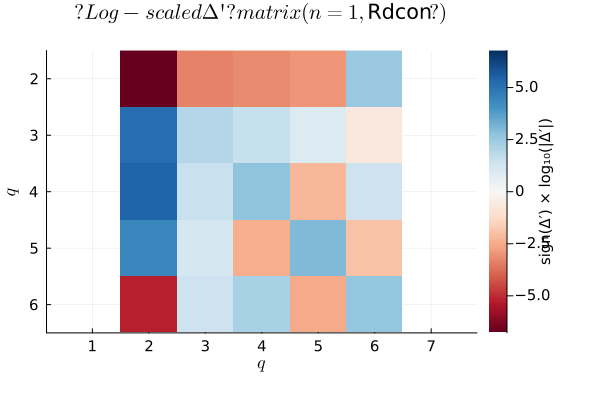

┌ Info: Removed Directory !
│   path = /tmp/dcon_80962a1a-6e5a-4b42-856d-01435484cc40
└ @ Main.DCON /home/aspire1019/code/DCON/src/DCON.jl:67
┌ Warning: Skipped xaxis arg top
└ @ Plots /home/aspire1019/.julia/packages/Plots/MR7sb/src/axes.jl:76


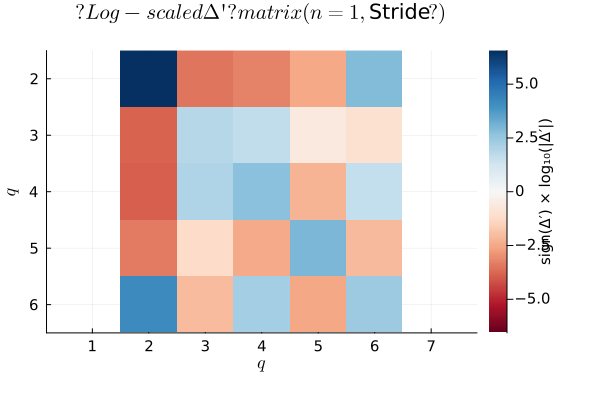


========== Stability Analysis Summary ==========

🔹 DCON ΔW
  - Mode (n = 2): δW = -49.263
  - Mode (n = 3): δW = -0.88668
  - Mode (n = 1): δW = -20.215

🔹 RDCON Δ′
  - Mode (n = 1): Δ′ = -6.0148e6

🔹 STRIDE Δ′
  - Mode (n = 1): Δ′ = 3.651e6

🔹 Ballooning Stability
  - Ballooning Mode (n = ∞): Unstable ❌


┌ Warning: Skipped xaxis arg top
└ @ Plots /home/aspire1019/.julia/packages/Plots/MR7sb/src/axes.jl:76


(Dict{Int64, Union{Nothing, Main.DCON.DCONOutputNetCDF}}(2 => Main.DCON.DCONOutputNetCDF([0, 1], [-12, -11, -10, -9, -8, -7, -6, -5, -4, -3  …  19, 20, 21, 22, 23, 24, 25, 26, 27, 28], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  32, 33, 34, 35, 36, 37, 38, 39, 40, 41], [0.01, 0.010148181201467524, 0.010592635547055184, 0.011333095314084414, 0.012369114477279132, 0.013700068977434681, 0.015325157097327761, 0.017243399944640907, 0.019453642041610618, 0.021954552021043953  …  0.9820454479789561, 0.9845463579583893, 0.986756600055359, 0.9886748429026722, 0.9902999310225652, 0.9916308855227208, 0.9926669046859157, 0.9934073644529449, 0.9938518187985325, 0.994], [27.859261975523562, 27.859740785302655, 27.861176324116517, 27.863565921725748, 27.866905132166835, 27.87118774041105, 27.87640577168906, 27.882549469462383, 27.889607029701203, 27.897564494946778  …  28.695542908478217, 28.69654801715176, 28.69734155833882, 28.697954848885015, 28.698417472477182, 28.698756238062707, 28.698994302127023, 28.6

In [3]:
dcon, rdcon, stride, ballooning, δW, Δ_rdcon, Δ_stride, ballooning_flag = DCON.run_stability(ini, gfile_path, plot_flag = true)

1. main branch fork 하고 그 위에서
2. src cases에 update하고 업데이트 시 pull